In [1]:
import pynucastro as pyna
import numpy as np
import matplotlib.pyplot as plt

In [4]:
rl = pyna.ReacLibLibrary()
lib = rl.linking_nuclei(["he4", "c12", "o16", "ne20"])
pynet = pyna.PythonNetwork(libraries=[lib])

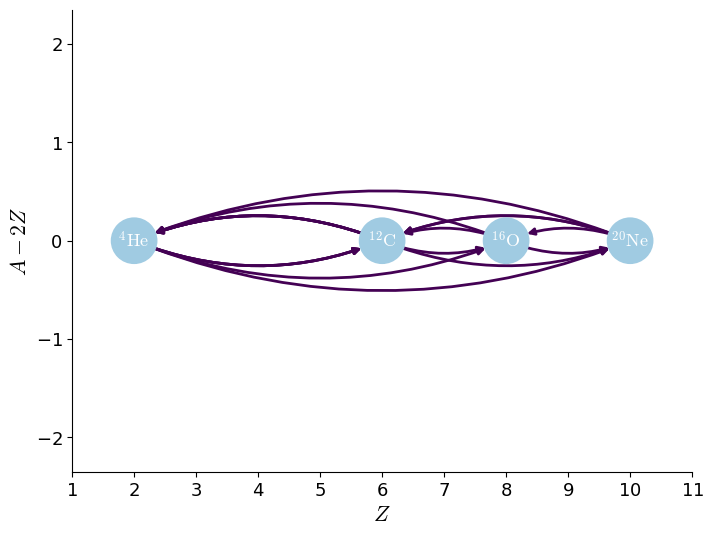

In [7]:
pynet.plot(curved_edges=True, rotated=True)

In [8]:
pynet.write_network("simple.py")

In [12]:
import simple
from pynucastro.screening import chugunov_2009

In [19]:
rho = 1.e6
T = 5.e8
X0 = np.zeros(simple.nnuc)
X0[simple.jhe4] = 0.7
X0[simple.jc12] = 0.1
X0[simple.jo16] = 0.1
X0[simple.jne20] = 0.1
Y0 = X0 / simple.A

In [20]:
Y0

array([0.175     , 0.00833333, 0.00625   , 0.005     ])

In [21]:
ydot = simple.rhs(0, Y0, rho, T, chugunov_2009)
print(ydot)

[-0.11201323  0.03725436 -0.00021685  0.00022351]


In [24]:
from scipy.integrate import solve_ivp

In [26]:
tmax = 0.1

sol = solve_ivp(simple.rhs, [0, tmax], Y0, method="BDF", jac=simple.jacobian,
                dense_output=True, args=(rho, T, chugunov_2009), rtol=1.e-6, atol=1.e-8)

In [27]:
for n in range(simple.nnuc):
    print(simple.names[n], sol.y[n,-1]*simple.A[n])

he4 0.658992157223816
c12 0.140908584583036
o16 0.09966553658716633
ne20 0.10043372160598155


In [29]:
len(sol.t)

17